In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from keras.datasets import 
import keras
import tensorflow as tf

In [2]:
(X_train,y_train),(X_test,y_test)=fashion_mnist.load_data()

4423680/4422102 [==============================] - 5s 1us/step


In [3]:
print(X_train.shape)

(60000, 28, 28)


In [4]:
print(X_test.shape)

(10000, 28, 28)


In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
X_test.shape

(10000, 28, 28)

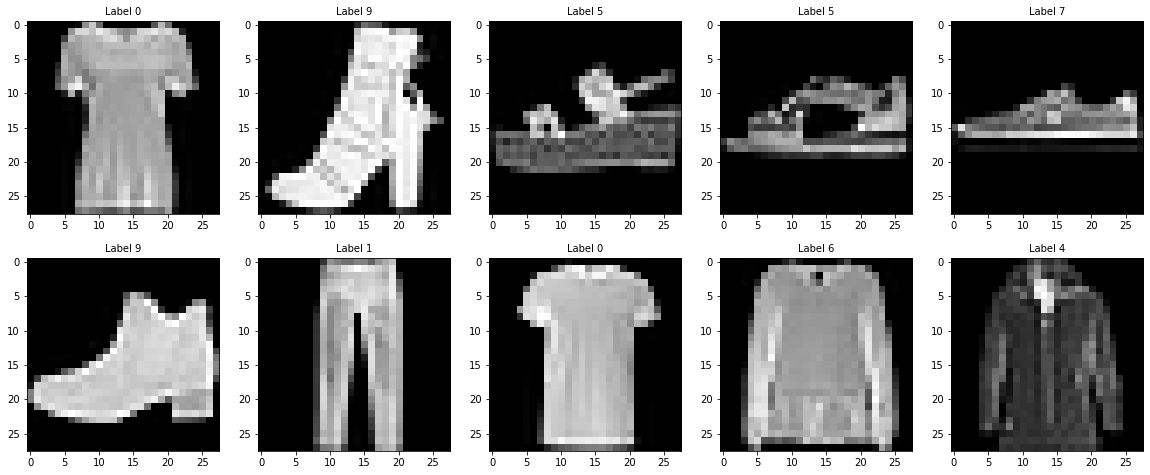

In [28]:
plt.figure(figsize=(20,8))
for index, (image,label) in enumerate(zip(X_train[10:20],y_train[10:20])):
    plt.subplot(2,5,index+1)
    plt.imshow(np.reshape(image,(28,28)),cmap='gray')
    plt.title("Label %i" %label, fontsize=10)

In [13]:
#0 : Tshirt or top
#1: Trouser
#2: Pullover
#3: Dress
#4: Coat
#5: Scandal
#6 : Shirt
#7 : Sneaker
#8: Bag
#9: Angkle boot
    

In [29]:
image_height=X_train.shape[1]
image_width=X_train.shape[2]

# Gray scale image will have rank =1 Normal image has rank =3
num_channels=1
train_data=np.reshape(X_train,(X_train.shape[0],image_height,image_width,num_channels))

In [30]:
test_data=np.reshape(X_test,(X_test.shape[0],image_height,image_width,num_channels))

In [31]:
test_data.shape 

(10000, 28, 28, 1)

In [33]:
#Use of one hot encoding
from keras.utils import to_categorical

In [34]:
num_classes=10
train_labels_cat=to_categorical(y_train,num_classes=num_classes)
test_labels_cat=to_categorical(y_test,num_classes=num_classes)

In [35]:
# Image reshaping : Normalization
train_data=train_data.astype('float32')/255
test_data=test_data.astype('float32')/255


In [36]:
from sklearn.model_selection import train_test_split

C:\Users\anirudh\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\anirudh\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [37]:
train_data2,val_data,train_label2,val_label=train_test_split(train_data,train_labels_cat,test_size=0.1)

In [38]:
## CNN

In [39]:
from keras.models import Sequential

In [40]:
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

In [57]:
def build_model():
    model= Sequential()   # No. of filters  is number of convolved matrices =64
    #Layer :1                                                      #same means : 0 padding and other is valid
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same',input_shape=(image_height,image_width,num_channels)))
    # Maxpooling
    model.add(MaxPooling2D(pool_size=(2,2)))
    #Layer :2
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same',input_shape=(image_height,image_width,num_channels)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    #Layer :3
    model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu',padding='same',input_shape=(image_height,image_width,num_channels)))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    ## Flatten the matrix
    model.add(Flatten())
    
    #Dense Layer
    model.add(Dense(units=150,activation='relu'))
    #Output layer
    model.add(Dropout(0.2))
    model.add(Dense(num_classes,activation='softmax'))
    
    # Optimizers and Loss functions     ##binary_crossentropy : 0,1 classes
    # -plogp -plog(1-p) where p is predicted obseration given by hypothesis function
    model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
    
    return model 

In [58]:
model=build_model()
model.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1152)             

In [59]:
history=model.fit(train_data2,train_label2,epochs=10,batch_size=80,validation_data=(val_data,val_label)) 

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 80s 1ms/step - loss: 0.5133 - accuracy: 0.8119 - val_loss: 0.3366 - val_accuracy: 0.8783
Epoch 2/10
54000/54000 [==============================] - 79s 1ms/step - loss: 0.3076 - accuracy: 0.8876 - val_loss: 0.2934 - val_accuracy: 0.8893
Epoch 3/10
54000/54000 [==============================] - 79s 1ms/step - loss: 0.2582 - accuracy: 0.9047 - val_loss: 0.2520 - val_accuracy: 0.9093
Epoch 4/10
54000/54000 [==============================] - 79s 1ms/step - loss: 0.2270 - accuracy: 0.9157 - val_loss: 0.2355 - val_accuracy: 0.9143
Epoch 5/10
54000/54000 [==============================] - 79s 1ms/step - loss: 0.2009 - accuracy: 0.9261 - val_loss: 0.2325 - val_accuracy: 0.9167
Epoch 6/10
54000/54000 [==============================] - 80s 1ms/step - loss: 0.1784 - accuracy: 0.9338 - val_loss: 0.2204 - val_accuracy: 0.9210
Epoch 7/10
54000/54000 [==============================] - 79s 1ms/ste

In [60]:
histroy=pd.DataFrame(history.history)
histroy

,val_loss,val_accuracy,loss,accuracy
0,0.336635,0.878333,0.513272,0.811907
1,0.293420,0.889333,0.307596,0.887648
2,0.252042,0.909333,0.258172,0.904667
3,0.235548,0.914333,0.227032,0.915704
4,0.232496,0.916667,0.200878,0.926093
5,0.220385,0.921000,0.178439,0.933815
6,0.221286,0.926500,0.158673,0.941241
7,0.215637,0.922833,0.143044,0.946315
8,0.223302,0.927500,0.123771,0.953815
9,0.219792,0.923333,0.110067,0.958815


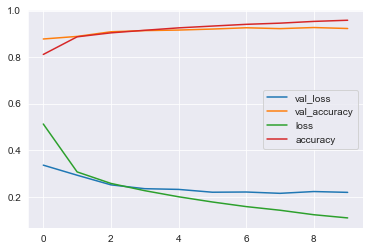

In [61]:
sns.set_style('darkgrid')
histroy.plot()

In [62]:
predictions=model.predict(test_data)


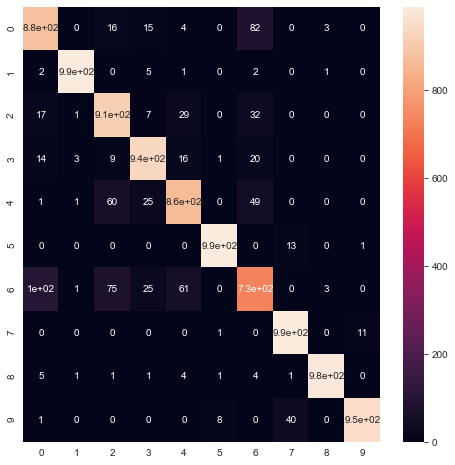

In [63]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,8))
sns.heatmap(confusion_matrix(np.argmax(test_labels_cat,axis=1),np.argmax(predictions,axis=1)),annot=True)

In [64]:
import cv2

In [65]:
bagimg=cv2.imread('C:/Users/anirudh/Pictures/Screenshots/bag.jpg',0)

In [66]:
bagimg=cv2.resize(bagimg,(28,28))

In [67]:
bagimg=cv2.bitwise_not(bagimg) 

In [68]:
bagimg_data=bagimg.reshape(1,28,28,1)

In [69]:
np.argmax(model.predict(bagimg_data))

8

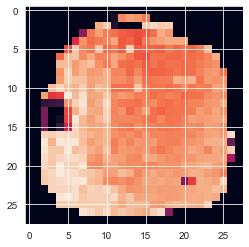

In [80]:
plt.imshow(np.reshape(bagimg_data,(28,28)))

In [71]:
Sandalimg=cv2.imread('C:/Users/anirudh/Pictures/Screenshots/Sandal.jpg',0)

In [72]:
Sandalimg=cv2.resize(Sandalimg,(28,28))

In [73]:
Sandalimg_data=Sandalimg.reshape(1,28,28,1)

In [74]:
np.argmax(model.predict(Sandalimg_data))

1

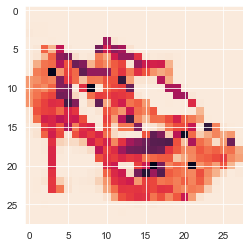

In [76]:
plt.imshow(np.reshape(Sandalimg_data,(28,28)))

1


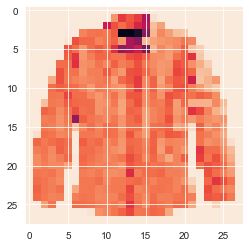

In [78]:
Shirtimg=cv2.imread('C:/Users/anirudh/Pictures/Screenshots/Shirt.jpg',0)
Shirtimg=cv2.resize(Shirtimg,(28,28))
Shirtimg_data=Shirtimg.reshape(1,28,28,1)
print(np.argmax(model.predict(Shirtimg_data)))
plt.imshow(np.reshape(Shirtimg_data,(28,28)))

2


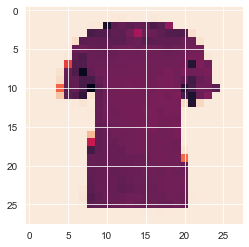

In [79]:
TShirtimg=cv2.imread('C:/Users/anirudh/Pictures/Screenshots/Tshirt.jpg',0)
TShirtimg=cv2.resize(TShirtimg,(28,28))
TShirtimg_data=TShirtimg.reshape(1,28,28,1)
print(np.argmax(model.predict(TShirtimg_data)))
plt.imshow(np.reshape(TShirtimg_data,(28,28)))